User Overview Analysis

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [63]:
import sys
import os
sys.path.append("../scripts") 
from data_selector import *
from data_cleaner import *
from data_visualizer import *
from data_outlier_handler import OutlierHandler

Load Data

In [8]:
# reading the csv file
missing_values = ["n/a", "na", "undefined"]
tellco_data = pd.read_csv("C:/Users/USER/Desktop/KAIM/TellCo-Data-Analysis/Data/TellCo_dataset.csv", na_values=missing_values)
tellco_data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [9]:
tellco_data.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [10]:
# reading the field descriptions file
tellco_field_desc_data = pd.read_excel("C:/Users/USER/Desktop/KAIM/TellCo-Data-Analysis/Data/Field Descriptions.xlsx")
tellco_field_desc_data

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)
2,Start,Start time of the xDR (first frame timestamp)
3,Start ms,Milliseconds offset of start time for the xDR ...
4,End,End time of the xDR (last frame timestamp)
5,End ms,Milliseconds offset of end time of the xDR (la...
6,Dur. (s),Total Duration of the xDR (in s)
7,IMSI,International Mobile Subscriber Identity
8,MSISDN/Number,MS International PSTN/ISDN Number of mobile - ...
9,IMEI,International Mobile Equipment Identity


Statistics

In [64]:
# number of elements in the df
tellco_data.size

8250055

In [12]:
# rows and columns in the df
tellco_data.shape

(150001, 55)

In [13]:
tellco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [14]:
# descriptive statistics that summarize the central tendency, dispersion of the TellCodata's numerical columns, excluding NaN values
tellco_data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


It doesn't make sense to compute descriptive statistics for Beared Id, IMSI, MSISDN/Number and IMEI. But the describe method computes the statistics of all numeric columns. Another thing is these statisics are computed before the data is cleaned. So there might be changes after missing values and outliers are handled.

Cleaning Columns

In [15]:
tellco_data.shape

(150001, 55)

In [16]:
# number of rows in the description
len(tellco_field_desc_data)

56

There are 150001 rows and 55 columns in the dataframe. However, we have 56 columns with their names and descriptions in tellco_field_desc_df. This means there is one column that is described but not included in the dataframe.

In [17]:
comparison_df = pd.concat([ pd.Series(tellco_data.columns.tolist()), tellco_field_desc_data['Fields']], axis=1)
comparison_df.rename(columns={0: 'Column names in dataframe', 'Fields': 'Column names in description file'}, inplace=True)
comparison_df

,Column names in dataframe,Column names in description file
0,Bearer Id,bearer id
1,Start,Dur. (ms)
2,Start ms,Start
3,End,Start ms
4,End ms,End
5,Dur. (ms),End ms
6,IMSI,Dur. (s)
7,MSISDN/Number,IMSI
8,IMEI,MSISDN/Number
9,Last Location Name,IMEI


In [18]:
tellco_data[['Dur. (ms)', 'Dur. (ms).1']]

,Dur. (ms),Dur. (ms).1
0,1823652.0,1.823653e+09
1,1365104.0,1.365104e+09
2,1361762.0,1.361763e+09
3,1321509.0,1.321510e+09
4,1089009.0,1.089009e+09
...,...,...
149996,81230.0,8.123076e+07
149997,97970.0,9.797070e+07
149998,98249.0,9.824953e+07
149999,97910.0,9.791063e+07


Missing Values

In [19]:
percent_missing_values(tellco_data)

The dataset contains 12.72 % missing values.


In [20]:
missing_df = missing_values_table(tellco_data)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.


In [21]:
missing_df

,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130254,86.84,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.56,float64
Nb of sec with 125000B < Vol DL,97538,65.02,float64
TCP UL Retrans. Vol (Bytes),96649,64.43,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.39,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.93,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.88,float64
TCP DL Retrans. Vol (Bytes),88146,58.76,float64
HTTP UL (Bytes),81810,54.54,float64
HTTP DL (Bytes),81474,54.32,float64


It is good to remove columns with more than 30% of missing values.

In [22]:
columns_to_be_removed = missing_df[missing_df['% of Total Values'] >= 30.00].index.tolist()
columns_to_be_removed

['Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 125000B < Vol DL',
 'TCP UL Retrans. Vol (Bytes)',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'TCP DL Retrans. Vol (Bytes)',
 'HTTP UL (Bytes)',
 'HTTP DL (Bytes)']

The TCP variables have too much missing values, instead of removing we will input since we need them for our analysis later.

In [23]:
columns_to_be_removed = [col for col in columns_to_be_removed if col not in ['TCP UL Retrans. Vol (Bytes)',
    'TCP DL Retrans. Vol (Bytes)']]
columns_to_be_removed

['Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'HTTP UL (Bytes)',
 'HTTP DL (Bytes)']

In [65]:
tellco_clean_data = tellco_data.drop(columns_to_be_removed, axis=1)
tellco_clean_data.shape

(150001, 47)

checking the status of missing values in the modified dataframe.

In [66]:
percent_missing_values(tellco_clean_data)

The dataset contains 3.85 % missing values.


In [26]:
missing_values_table(tellco_clean_data)

Your selected dataframe has 47 columns.
There are 33 columns that have missing values.


,Missing Values,% of Total Values,Dtype
TCP UL Retrans. Vol (Bytes),96649,64.43,float64
TCP DL Retrans. Vol (Bytes),88146,58.76,float64
Avg RTT DL (ms),27829,18.55,float64
Avg RTT UL (ms),27812,18.54,float64
Handset Type,9559,6.37,object
Handset Manufacturer,9559,6.37,object
Last Location Name,1153,0.77,object
MSISDN/Number,1066,0.71,float64
Bearer Id,991,0.66,float64
Nb of sec with Vol UL < 1250B,793,0.53,float64


Since the missing percentages of 'TCP UL Retrans. Vol (Bytes)' and 'TCP DL Retrans. Vol (Bytes)' are very high we will impute them with the bacward fill method. In this case, using a single value like mean or median is not advisable as it may heavily bais our data in an unwanted way by making the majority of values equal to a single value.

In [27]:
fix_missing_bfill(tellco_clean_data, 'TCP UL Retrans. Vol (Bytes)')

c:\Users\USER\Desktop\KAIM\TellCo-Data-Analysis\notebooks\../scripts\data_cleaner.py:93: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='bfill')


96649 missing values in the column TCP UL Retrans. Vol (Bytes) have been replaced using the backward fill method.


0         7230.0
1         7230.0
2         7230.0
3         7230.0
4         7230.0
           ...  
149996       NaN
149997       NaN
149998       NaN
149999       NaN
150000       NaN
Name: TCP UL Retrans. Vol (Bytes), Length: 150001, dtype: float64

Avg RTT DL (ms) and Avg RTT UL (ms) have the next highest percentages of missing values with around 18.5% each.

In [28]:
tellco_clean_data['Avg RTT DL (ms)'].skew(skipna=True)

np.float64(62.90782807995961)

Since both the columns Avg RTT DL (ms) and Avg RTT UL (ms) are heavily positively skewed, it is advisable not to impute them with their mean. So we will use forward fill.

In [29]:
fix_missing_ffill(tellco_clean_data, 'Avg RTT DL (ms)')

27829 missing values in the column Avg RTT DL (ms) have been replaced using the forward fill method.


c:\Users\USER\Desktop\KAIM\TellCo-Data-Analysis\notebooks\../scripts\data_cleaner.py:86: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill')


0         42.0
1         65.0
2         65.0
3         65.0
4         65.0
          ... 
149996    32.0
149997    27.0
149998    43.0
149999    37.0
150000    37.0
Name: Avg RTT DL (ms), Length: 150001, dtype: float64

In [30]:
fix_missing_ffill(tellco_clean_data, 'Avg RTT UL (ms)')

27812 missing values in the column Avg RTT UL (ms) have been replaced using the forward fill method.


0         5.0
1         5.0
2         5.0
3         5.0
4         5.0
         ... 
149996    0.0
149997    2.0
149998    6.0
149999    5.0
150000    5.0
Name: Avg RTT UL (ms), Length: 150001, dtype: float64

In [31]:
percent_missing_values(tellco_clean_data)

The dataset contains 1.69 % missing values.


In [32]:
percent_missing_rows(tellco_clean_data)

61.29 % of the rows in the dataset contain atleast one missing value.


In [33]:
missing_values_table(tellco_clean_data)

Your selected dataframe has 47 columns.
There are 31 columns that have missing values.


,Missing Values,% of Total Values,Dtype
TCP DL Retrans. Vol (Bytes),88146,58.76,float64
Handset Type,9559,6.37,object
Handset Manufacturer,9559,6.37,object
Last Location Name,1153,0.77,object
MSISDN/Number,1066,0.71,float64
Bearer Id,991,0.66,float64
Nb of sec with Vol UL < 1250B,793,0.53,float64
UL TP < 10 Kbps (%),792,0.53,float64
10 Kbps < UL TP < 50 Kbps (%),792,0.53,float64
UL TP > 300 Kbps (%),792,0.53,float64


Since "Handset Type" and "Handset Manufacturer" are categorical columns, it is better to inpute them with the value "unknown" so that we don't bias the data.

In [34]:
fix_missing_value(tellco_clean_data, 'Handset Type', 'unknown')
fix_missing_value(tellco_clean_data, 'Handset Manufacturer', 'unknown')

9559 missing values in the column Handset Type have been replaced by unknown.
9559 missing values in the column Handset Manufacturer have been replaced by unknown.


0         Samsung
1         Samsung
2         Samsung
3         unknown
4         Samsung
           ...   
149996      Apple
149997      Apple
149998      Apple
149999     Huawei
150000    unknown
Name: Handset Manufacturer, Length: 150001, dtype: object

In [35]:
percent_missing_values(tellco_clean_data)

The dataset contains 1.42 % missing values.


In [36]:
percent_missing_rows(tellco_clean_data)

59.61 % of the rows in the dataset contain atleast one missing value.


Since only 2.08% of the rows contain atleast one missing value and the total number of rows is around 150000, dropping these rows won't have a noticable negative impact.

In [37]:
drop_rows_with_missing_values(tellco_clean_data)

89415 rows containg missing values were dropped.


In [38]:
percent_missing_values(tellco_clean_data)

The dataset contains 0.0 % missing values.


Data Type Conversion

In [39]:
tellco_clean_data.dtypes

Bearer Id                         float64
Start                              object
Start ms                          float64
End                                object
End ms                            float64
Dur. (ms)                         float64
IMSI                              float64
MSISDN/Number                     float64
IMEI                              float64
Last Location Name                 object
Avg RTT DL (ms)                   float64
Avg RTT UL (ms)                   float64
Avg Bearer TP DL (kbps)           float64
Avg Bearer TP UL (kbps)           float64
TCP DL Retrans. Vol (Bytes)       float64
TCP UL Retrans. Vol (Bytes)       float64
DL TP < 50 Kbps (%)               float64
50 Kbps < DL TP < 250 Kbps (%)    float64
250 Kbps < DL TP < 1 Mbps (%)     float64
DL TP > 1 Mbps (%)                float64
UL TP < 10 Kbps (%)               float64
10 Kbps < UL TP < 50 Kbps (%)     float64
50 Kbps < UL TP < 300 Kbps (%)    float64
UL TP > 300 Kbps (%)              

In [40]:
tellco_clean_data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
7,1.304243e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,951292.0,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,...,12189786.0,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0
9,1.304243e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0
11,1.311448e+19,4/15/2019 11:33,626.0,4/25/2019 18:44,542.0,889834.0,2.082019e+14,3.366447e+10,8.600910e+13,T21335C,...,2805710.0,16817598.0,18094847.0,2029991.0,504604946.0,1063672.0,526987098.0,11382619.0,33691738.0,535118044.0
14,1.304243e+19,4/16/2019 0:35,909.0,4/25/2019 0:40,284.0,777887.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,22283256.0,3025236.0,14599101.0,11634512.0,251467133.0,3629272.0,40078751.0,10359946.0,32480400.0,298662697.0
15,7.277826e+18,4/16/2019 8:56,2.0,4/25/2019 9:44,480.0,780471.0,2.082017e+14,3.375376e+10,3.557301e+13,T88606B,...,8715993.0,17842011.0,322630.0,5235123.0,26045464.0,16321224.0,137148601.0,15351908.0,58387271.0,42659750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149982,6.917538e+18,4/29/2019 7:28,982.0,4/30/2019 7:28,97.0,86397.0,2.082009e+14,3.366658e+10,3.526021e+13,C89301A,...,17136452.0,20836227.0,15303037.0,12240842.0,589622344.0,5444586.0,35250466.0,15526182.0,58152607.0,628198371.0
149986,1.304243e+19,4/29/2019 7:28,750.0,4/30/2019 7:28,744.0,86399.0,2.082017e+14,3.366436e+10,3.515541e+13,L40618C,...,13272930.0,11807507.0,21764033.0,3202577.0,65608921.0,14197776.0,75340609.0,11149201.0,43014637.0,117862151.0
149989,7.349883e+18,4/29/2019 7:28,331.0,4/30/2019 7:28,301.0,86399.0,2.082009e+14,3.368584e+10,3.528141e+13,D94471B,...,14756393.0,335799.0,16711345.0,1700461.0,293969967.0,9684150.0,31302418.0,15913096.0,30195650.0,335057056.0
149990,1.304243e+19,4/29/2019 7:28,438.0,4/30/2019 6:46,83.0,83844.0,2.082014e+14,3.376127e+10,3.532701e+13,D70706A,...,8402539.0,899942.0,2029635.0,3443119.0,365096332.0,8496393.0,624206761.0,9343135.0,22489208.0,383881536.0


By observing the columns we can realize that "Start" and "End" columns are actually datetime values even though they are labelled  as objects by pandas. Besides these two cloumns all the other columns with object data types are actually string values. So we will convert these columns to their appropriate data types.

In [41]:
convert_to_datetime(tellco_clean_data, ['Start', 'End'])

In [42]:
# get the columns with object data type
string_columns = tellco_clean_data.select_dtypes(include='object').columns.tolist()
string_columns

['Last Location Name', 'Handset Manufacturer', 'Handset Type']

In [43]:
convert_to_string(tellco_clean_data, string_columns)

We also know that Bearer Id, IMSI, MSISDN/Number, IMEI are unique numbers used for identification. So for better readability we will change them from float64 to int64.

In [44]:
int_cols = ['Bearer Id', 'IMSI', 'MSISDN/Number', 'IMEI',]
convert_to_int(tellco_clean_data, int_cols)

In [45]:
tellco_clean_data.dtypes

Bearer Id                                  int64
Start                             datetime64[ns]
Start ms                                 float64
End                               datetime64[ns]
End ms                                   float64
Dur. (ms)                                float64
IMSI                                       int64
MSISDN/Number                              int64
IMEI                                       int64
Last Location Name                string[python]
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                  float64
Avg Bearer TP UL (kbps)                  float64
TCP DL Retrans. Vol (Bytes)              float64
TCP UL Retrans. Vol (Bytes)              float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%) 

Dropping Duplicates

In [46]:
# search for duplicate rows and drop them
drop_duplicates(tellco_clean_data)

No duplicate rows were found.


As we have seen in the column cleaning section we have two duration columns one in seconds and the other in micro seconds. Let us check if the values are equal by converting the micro seconds to seconds.

In [47]:
print(tellco_clean_data.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',


In [48]:
drop_columns(tellco_clean_data, ['Dur. (ms)'])

1 column was dropped.


Outlier Detection

In [49]:
columns = tellco_clean_data.select_dtypes('float64').columns.tolist()
columns

['Start ms',
 'End ms',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (Bytes)']

In [77]:
tellco_clean_data['Social Media Data Volume (Bytes)'] = tellco_clean_data['Social Media UL (Bytes)'] + tellco_clean_data['Social Media DL (Bytes)']
tellco_clean_data['Google Data Volume (Bytes)'] = tellco_clean_data['Google UL (Bytes)'] + tellco_clean_data['Google DL (Bytes)']
tellco_clean_data['Email Data Volume (Bytes)'] = tellco_clean_data['Email UL (Bytes)'] + tellco_clean_data['Email DL (Bytes)']
tellco_clean_data['Youtube Data Volume (Bytes)'] = tellco_clean_data['Youtube UL (Bytes)'] + tellco_clean_data['Youtube DL (Bytes)']
tellco_clean_data['Netflix Data Volume (Bytes)'] = tellco_clean_data['Netflix UL (Bytes)'] + tellco_clean_data['Netflix DL (Bytes)']
tellco_clean_data['Gaming Data Volume (Bytes)'] = tellco_clean_data['Gaming UL (Bytes)'] + tellco_clean_data['Gaming DL (Bytes)']
tellco_clean_data['Other Data Volume (Bytes)'] = tellco_clean_data['Other UL (Bytes)'] + tellco_clean_data['Other DL (Bytes)']
tellco_clean_data['Total Data Volume (Bytes)'] = tellco_clean_data['Total UL (Bytes)'] + tellco_clean_data['Total DL (Bytes)']


In [78]:
print(tellco_clean_data.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',


In [51]:
tellco_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60586 entries, 7 to 149995
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Bearer Id                         60586 non-null  int64         
 1   Start                             60586 non-null  datetime64[ns]
 2   Start ms                          60586 non-null  float64       
 3   End                               60586 non-null  datetime64[ns]
 4   End ms                            60586 non-null  float64       
 5   IMSI                              60586 non-null  int64         
 6   MSISDN/Number                     60586 non-null  int64         
 7   IMEI                              60586 non-null  int64         
 8   Last Location Name                60586 non-null  string        
 9   Avg RTT DL (ms)                   60586 non-null  float64       
 10  Avg RTT UL (ms)                   60586 non-null  

Saving data

In [52]:
# save the clean dataframe to a csv file
tellco_clean_data.to_csv('../data/cleaned_Tellco_data.csv')

Univariate Analysis

Handset Manufacturer

In [53]:
# unique value counts
counts_df = tellco_clean_data['Handset Manufacturer'].value_counts()
counts_df

Handset Manufacturer
Huawei                                               25129
Apple                                                15406
Samsung                                              13758
unknown                                               2519
Wiko Global Sasu                                       589
                                                     ...  
Tianlong International (Hk) Co Ltd                       1
Shenzhen Kelly The Communication Equipment Co Ltd        1
Gemalto M2M Gmbh                                         1
Mikrotikls Sia                                           1
Ck Telecom Limited                                       1
Name: count, Length: 147, dtype: Int64

In [54]:
plot_pie(tellco_clean_data, 'Handset Manufacturer', 200)

Handset Type

In [55]:
# unique value counts
counts_df = tellco_clean_data['Handset Type'].value_counts()
counts_df

Handset Type
Huawei B528S-23A                    18329
unknown                              2519
Apple iPhone 6 (A1586)               2458
Apple iPhone 6S (A1688)              1986
Huawei E5180                         1877
                                    ...  
Samsung Gt-S5660                        1
Sony Mobile Comm. Pm-0953-Bv            1
Huawei Nova 3I                          1
Sony Mobile Comm. Xperia M2 Dual        1
Spa Condor Elect. A9 Plus               1
Name: count, Length: 1179, dtype: Int64

In [56]:
plot_pie(tellco_clean_data, 'Handset Type', 700)

Dur (ms)

In [69]:
# important statistical measurements of center and dispersion
tellco_clean_data[['Dur. (ms)']].describe()

,Dur. (ms)
count,1.500000e+05
mean,1.046086e+05
std,8.103762e+04
min,7.142000e+03
25%,5.744050e+04
50%,8.639900e+04
75%,1.324302e+05
max,1.859336e+06


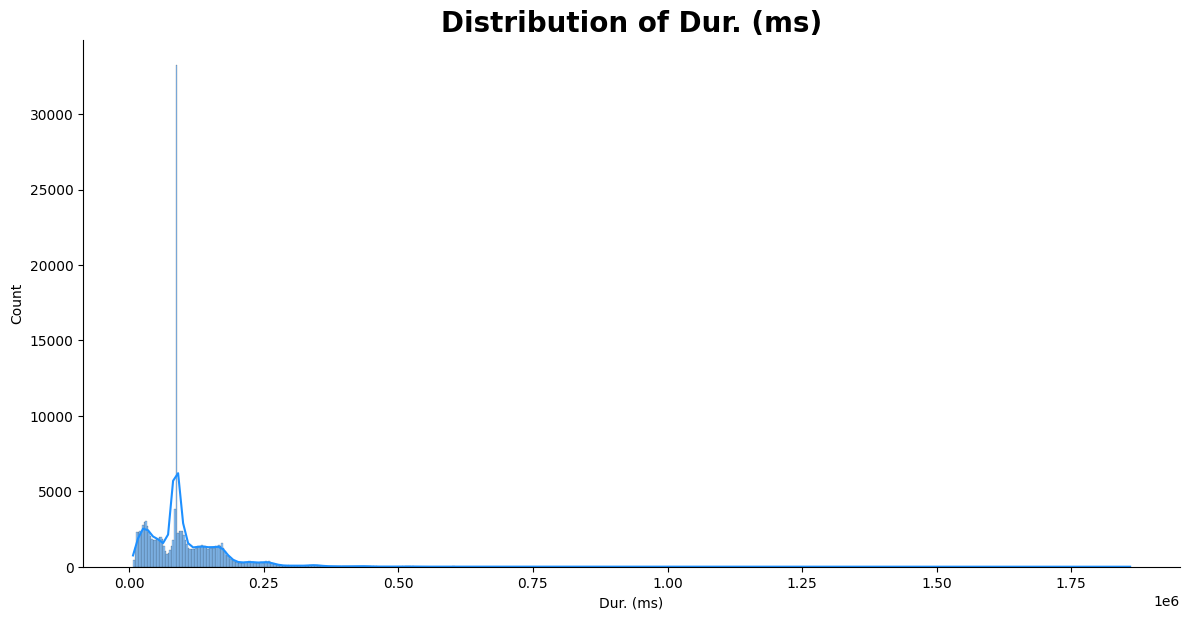

In [72]:
plotly_plot_hist(tellco_clean_data, 'Dur. (ms)', 'dodgerblue')

Social Media Volume

In [91]:
# important statistical measurements of center and dispersion
tellco_clean_data[['Social Media Data Volume (Bytes)']].describe()

,Social Media Data Volume (Bytes)
count,1.500010e+05
mean,1.828250e+06
std,1.035646e+06
min,1.563000e+03
25%,9.322180e+05
50%,1.826471e+06
75%,2.727487e+06
max,3.650861e+06


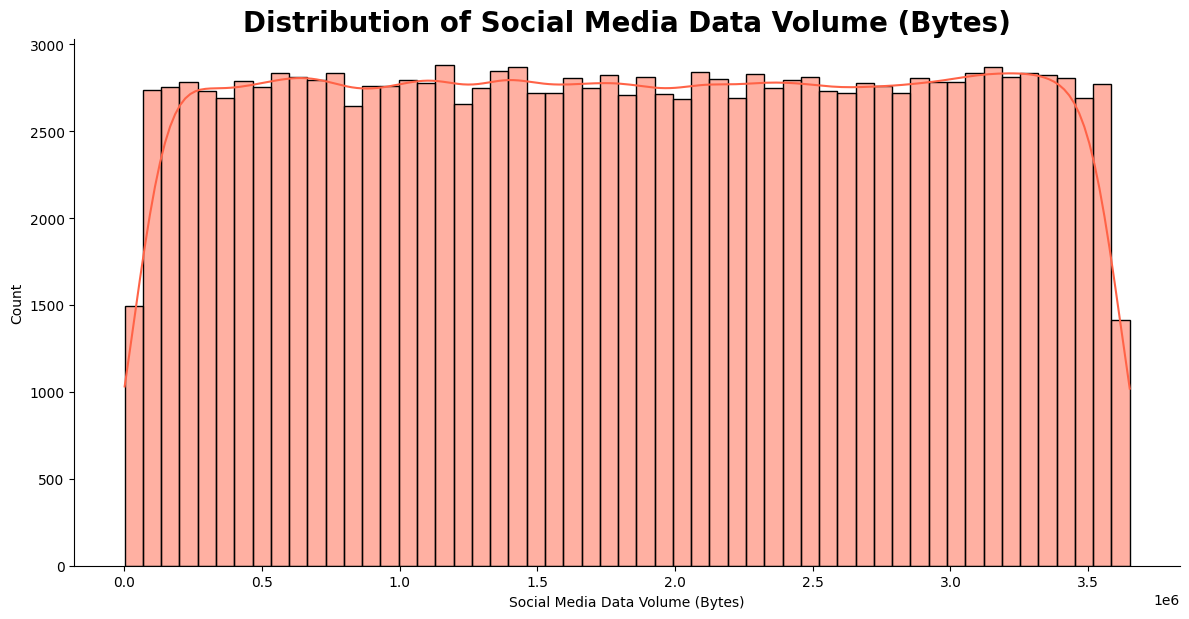

In [92]:
plotly_plot_hist(tellco_clean_data, 'Social Media Data Volume (Bytes)', 'tomato')

Gaming Data Volume

In [60]:
# important statistical measurements of center and dispersion
tellco_clean_data[['Gaming Data Volume (Bytes)']].describe()

,Gaming Data Volume (Bytes)
count,6.058600e+04
mean,4.298446e+08
std,2.439746e+08
min,5.953750e+05
25%,2.179972e+08
50%,4.310721e+08
75%,6.405244e+08
max,8.592028e+08


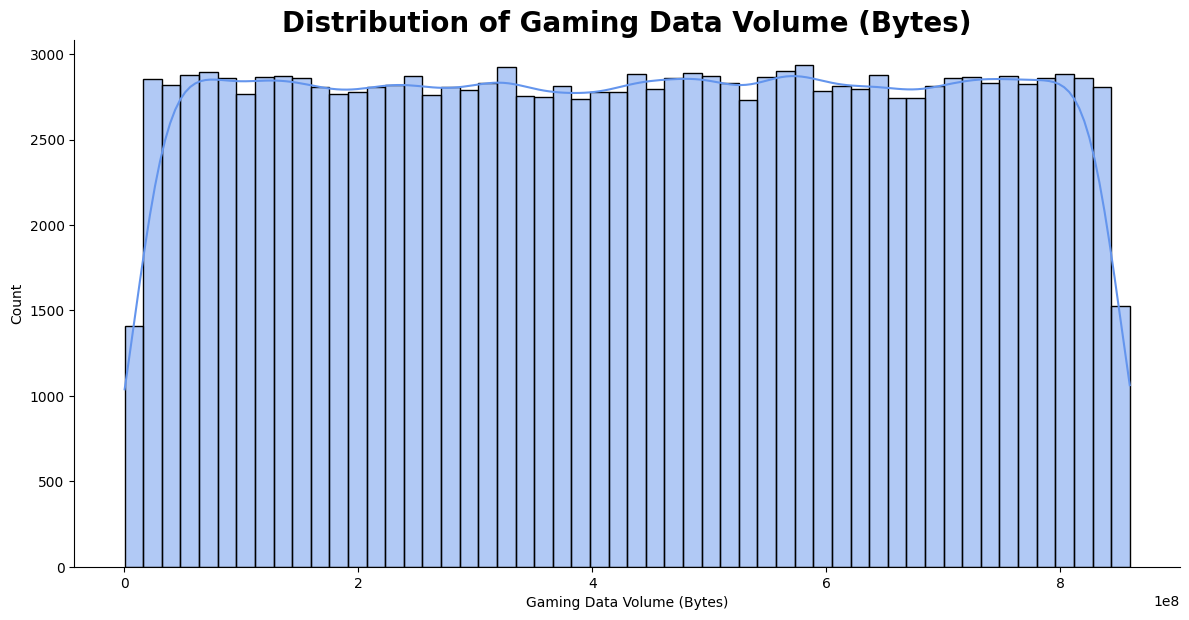

In [79]:
plotly_plot_hist(tellco_clean_data, 'Gaming Data Volume (Bytes)', 'cornflowerblue')

Netflix Data Volume

In [81]:
# important statistical measurements of center and dispersion
tellco_clean_data[['Netflix Data Volume (Bytes)']].describe()

,Netflix Data Volume (Bytes)
count,1.500010e+05
mean,2.262861e+07
std,9.260820e+06
min,9.843200e+04
25%,1.597946e+07
50%,2.263554e+07
75%,2.929044e+07
max,4.519815e+07


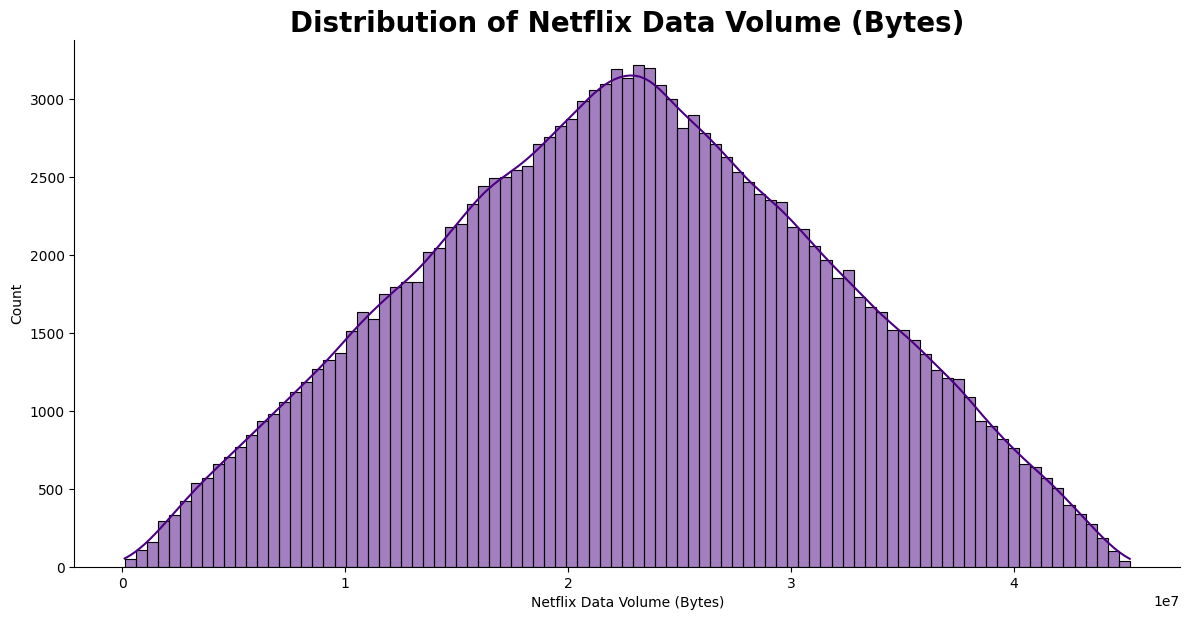

In [84]:
plotly_plot_hist(tellco_clean_data, 'Netflix Data Volume (Bytes)' , 'indigo')

Youtube Data Volume

In [85]:
# important statistical measurements of center and dispersion
tellco_clean_data[['Youtube Data Volume (Bytes)']].describe()

,Youtube Data Volume (Bytes)
count,1.500010e+05
mean,2.264348e+07
std,9.246800e+06
min,7.890300e+04
25%,1.599846e+07
50%,2.266177e+07
75%,2.929260e+07
max,4.519008e+07


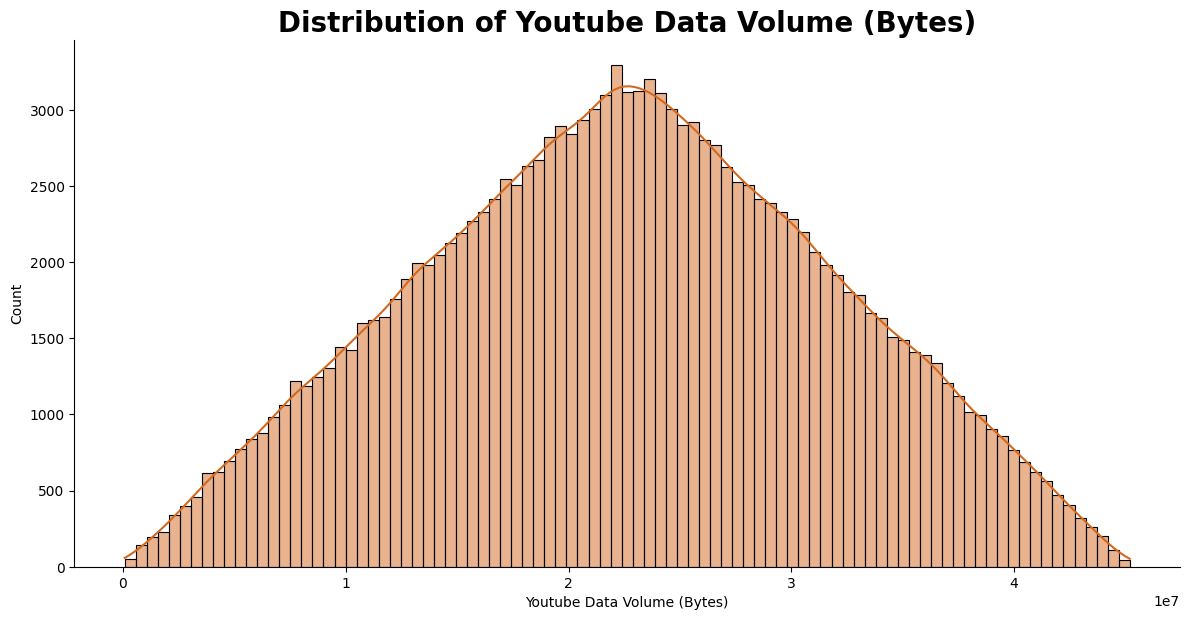

In [86]:
plotly_plot_hist(tellco_clean_data, 'Youtube Data Volume (Bytes)', 'chocolate')

Email Data Volume

In [87]:
# important statistical measurements of center and dispersion
tellco_clean_data[['Email Data Volume (Bytes)']].describe()

,Email Data Volume (Bytes)
count,1.500010e+05
mean,2.259102e+06
std,1.071109e+06
min,8.359000e+03
25%,1.359344e+06
50%,2.263567e+06
75%,3.159818e+06
max,4.518036e+06


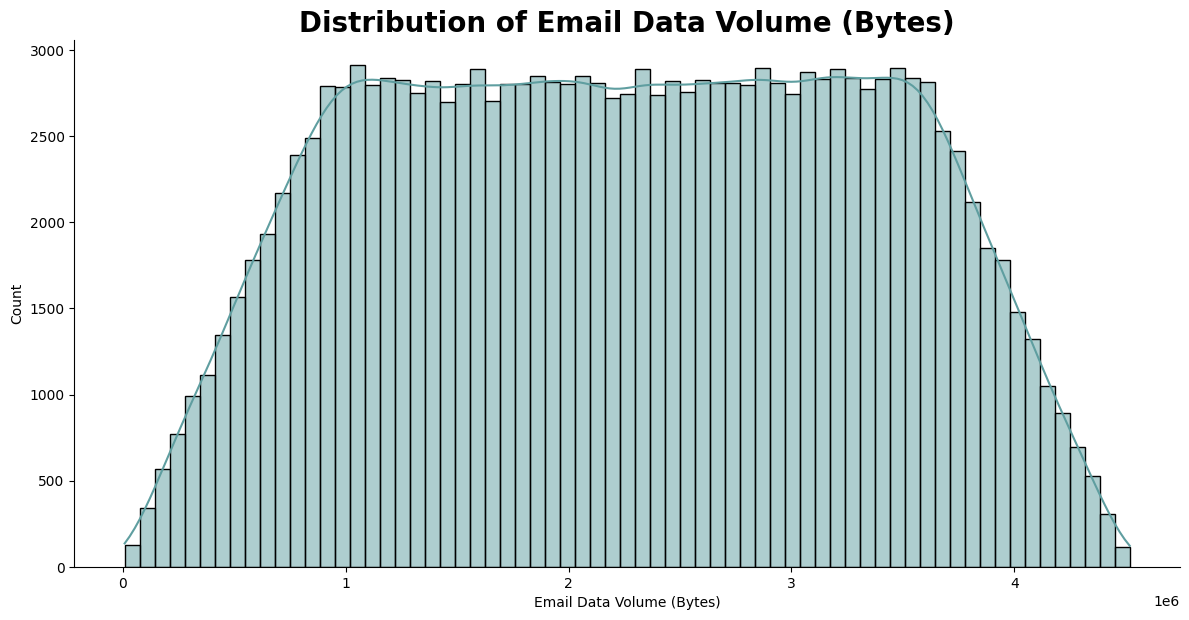

In [88]:
plotly_plot_hist(tellco_clean_data, 'Email Data Volume (Bytes)', 'cadetblue')

Google Data volume

In [89]:
# important statistical measurements of center and dispersion
tellco_clean_data[['Google Data Volume (Bytes)']].describe()

,Google Data Volume (Bytes)
count,1.500010e+05
mean,7.807295e+06
std,3.516420e+06
min,4.033000e+04
25%,4.943599e+06
50%,7.812835e+06
75%,1.068280e+07
max,1.552878e+07


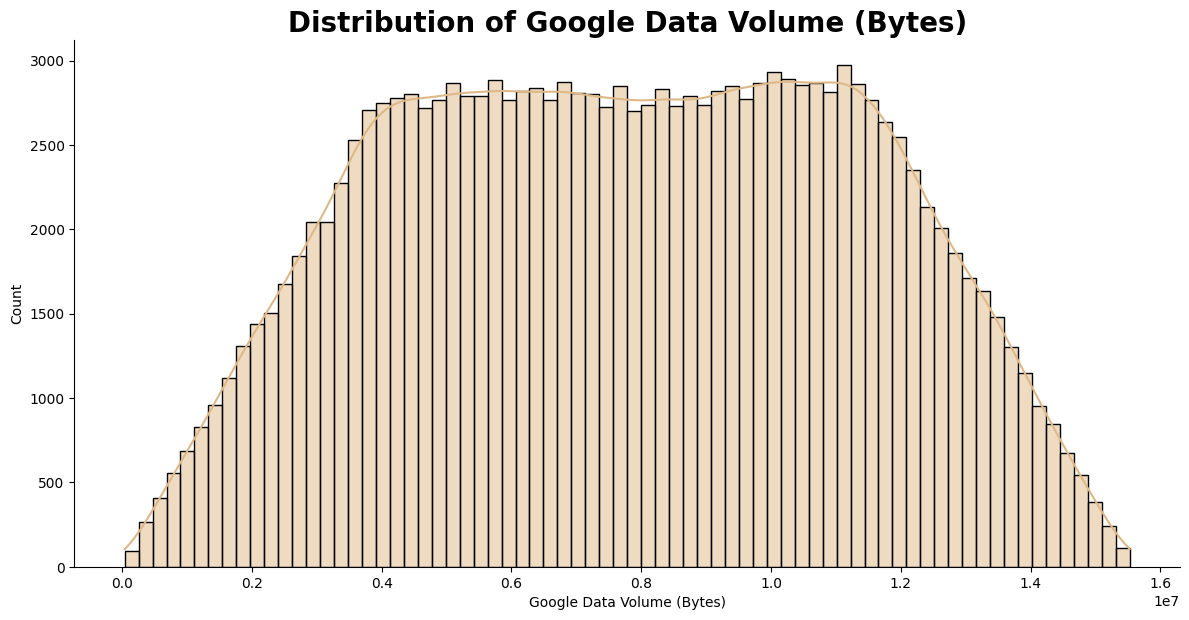

In [90]:
plotly_plot_hist(tellco_clean_data, 'Google Data Volume (Bytes)', 'burlywood')

Other Data Volume

In [93]:
# important statistical measurements of center and dispersion
tellco_clean_data[['Other Data Volume (Bytes)']].describe()

,Other Data Volume (Bytes)
count,1.500010e+05
mean,4.293653e+08
std,2.432681e+08
min,1.490450e+05
25%,2.185534e+08
50%,4.299865e+08
75%,6.399275e+08
max,8.595209e+08


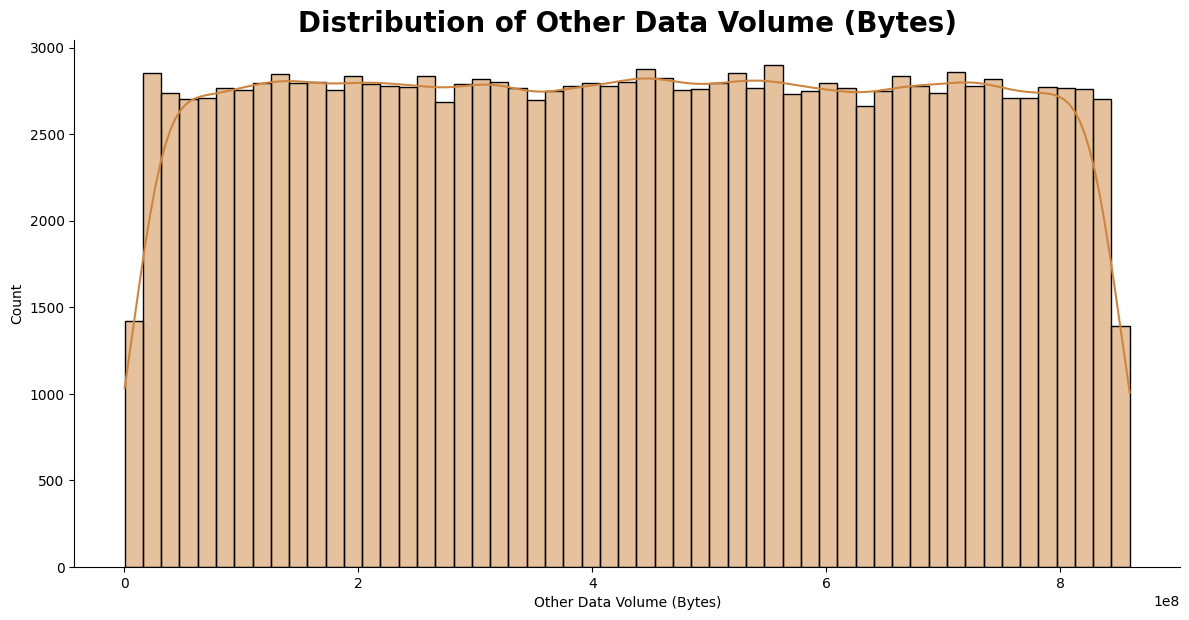

In [94]:
plotly_plot_hist(tellco_clean_data, 'Other Data Volume (Bytes)', 'peru')

Total Data Volume

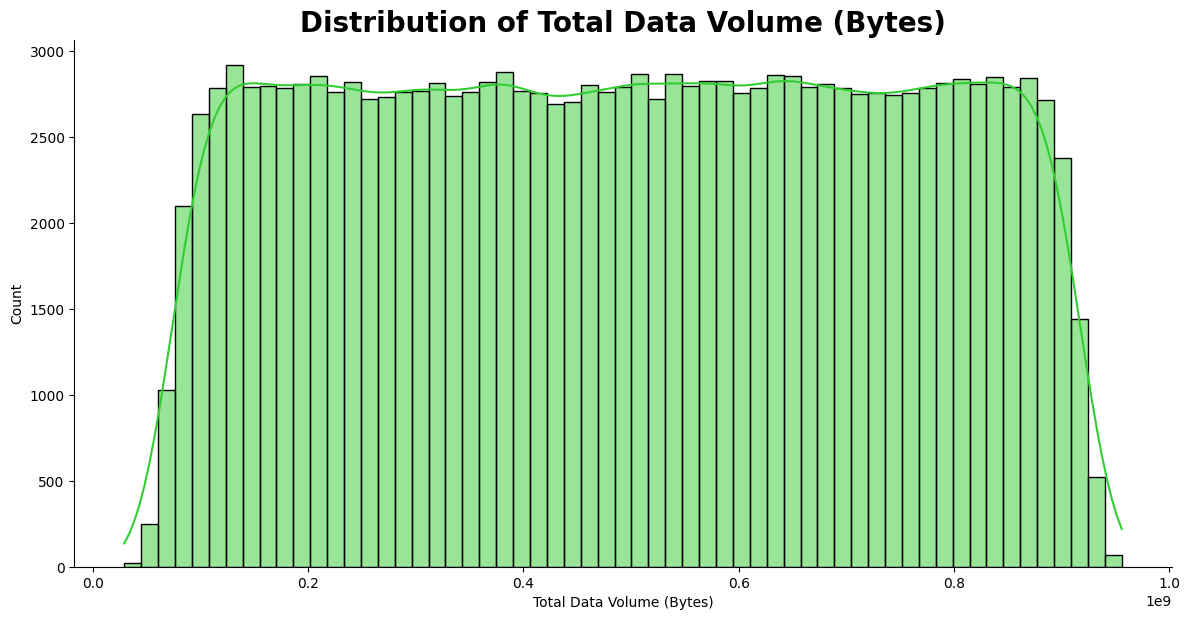

In [95]:
plotly_plot_hist(tellco_clean_data, 'Total Data Volume (Bytes)', 'limegreen')

Bivariate Analysis

Social Media Data Volume (Bytes) and Total Data Volume (Bytes)

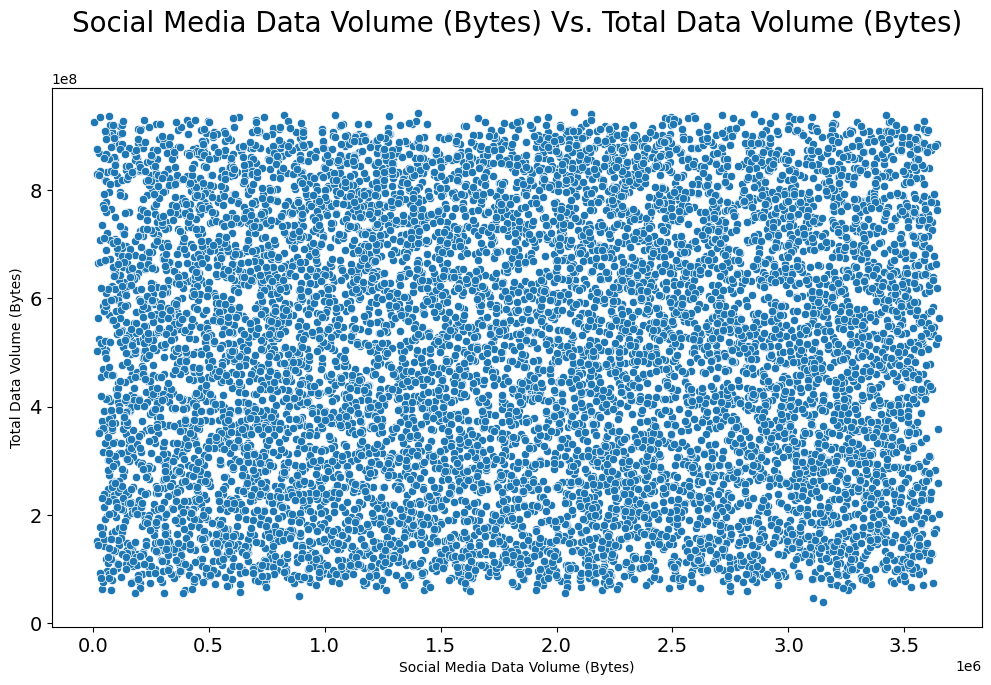

In [96]:
plot_scatter(tellco_clean_data.sample(10000), 'Social Media Data Volume (Bytes)', 'Total Data Volume (Bytes)')

Google Data Volume (Bytes) and Total Data Volume (Bytes)

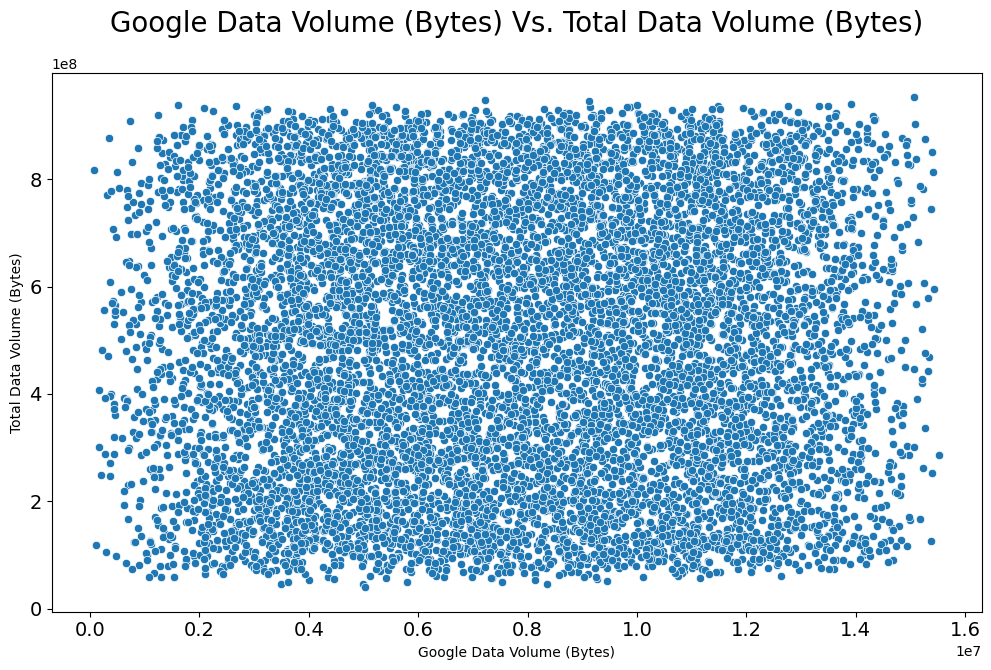

In [97]:
plot_scatter(tellco_clean_data.sample(10000), 'Google Data Volume (Bytes)', 'Total Data Volume (Bytes)')

Email Data Volume (Bytes) and Total Data Volume (Bytes)

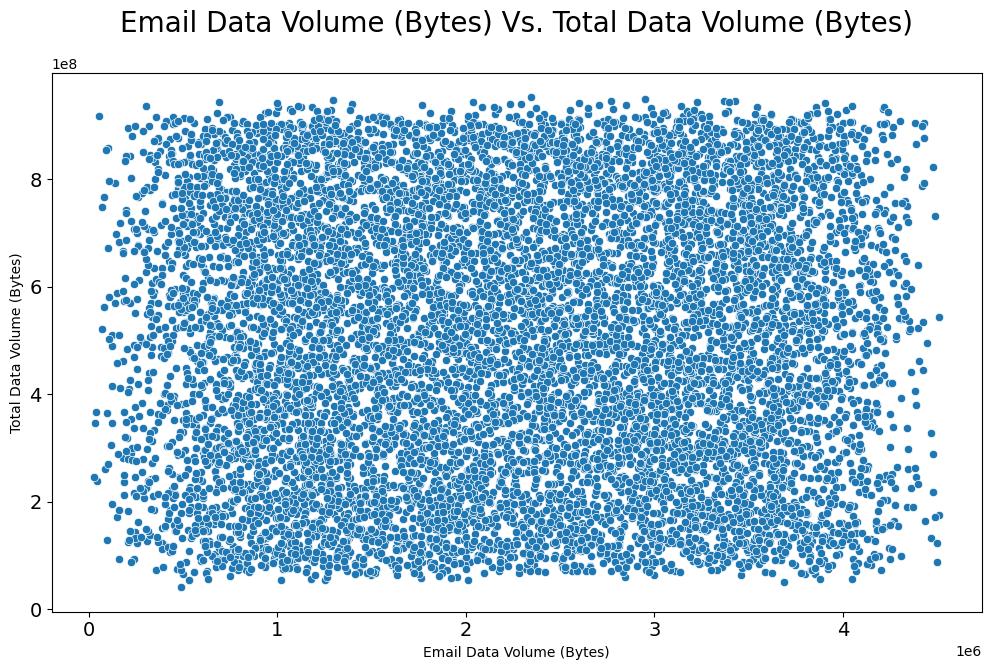

In [98]:
plot_scatter(tellco_clean_data.sample(10000), 'Email Data Volume (Bytes)', 'Total Data Volume (Bytes)')

Youtube Data Volume (Bytes) and Total Data Volume (Bytes)

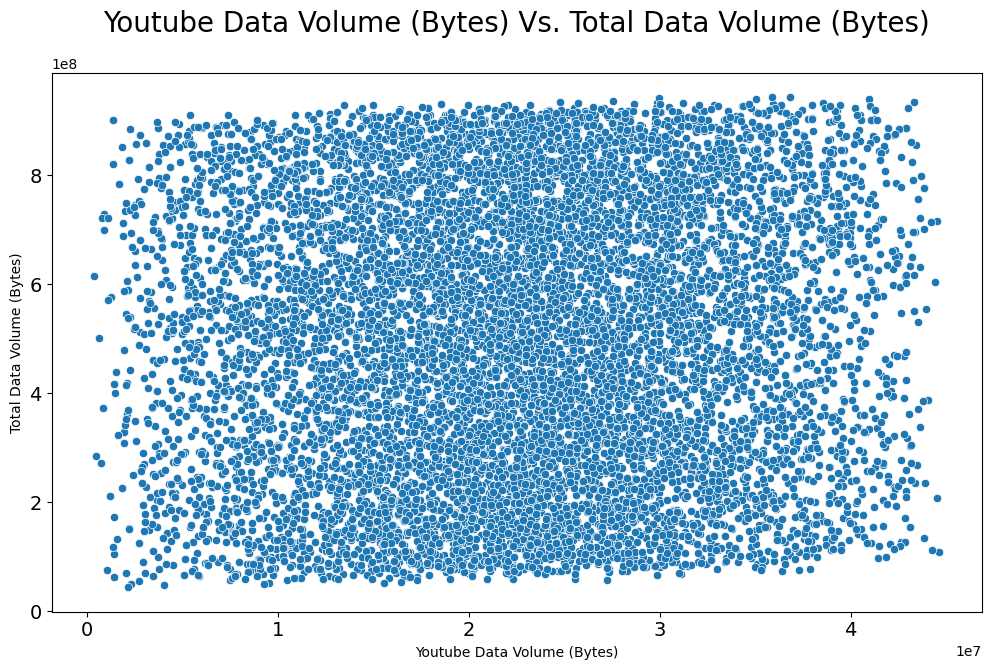

In [100]:
plot_scatter(tellco_clean_data.sample(10000), 'Youtube Data Volume (Bytes)', 'Total Data Volume (Bytes)')

Netflix Data Volume (Bytes) and Total Data Volume (Bytes)

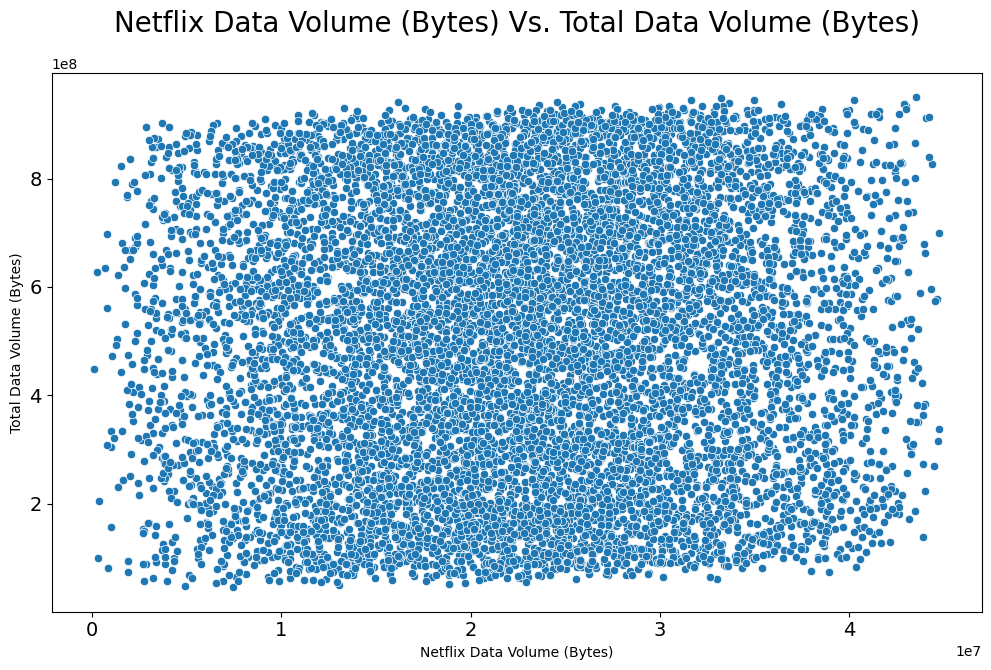

In [101]:
plot_scatter(tellco_clean_data.sample(10000), 'Netflix Data Volume (Bytes)', 'Total Data Volume (Bytes)')

Gaming Data Volume (Bytes) and Total Data Volume (Bytes)

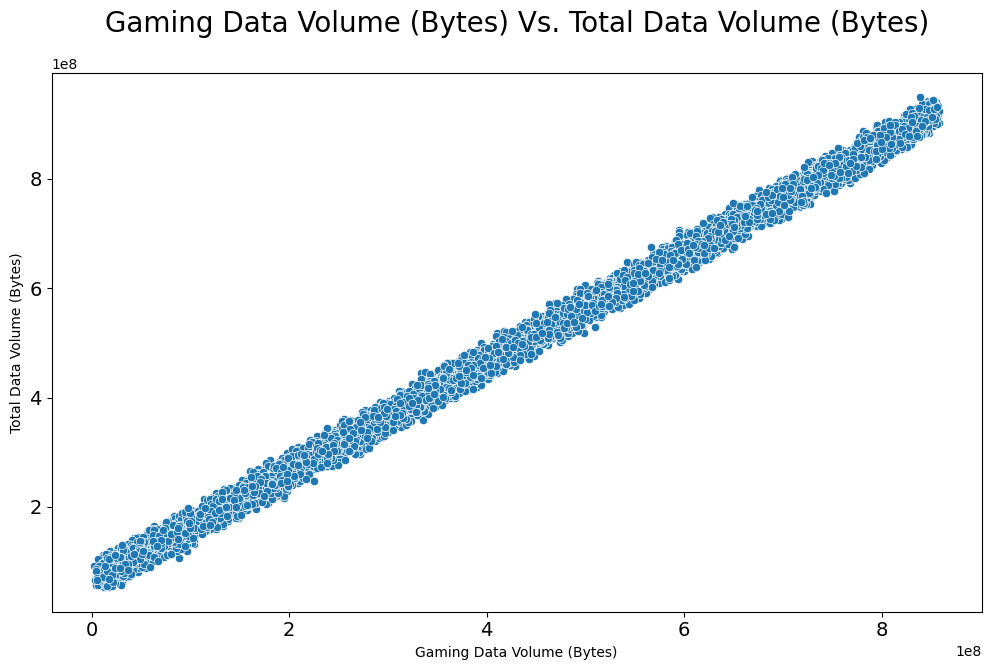

In [102]:
plot_scatter(tellco_clean_data.sample(10000), 'Gaming Data Volume (Bytes)', 'Total Data Volume (Bytes)')

Correlation Analysis

In [103]:
application_cols = ['Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)', 'Email Data Volume (Bytes)',
    'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)', 'Gaming Data Volume (Bytes)',
    'Other Data Volume (Bytes)']

corr_df = tellco_clean_data[application_cols].corr()
corr_df

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes)
Social Media Data Volume (Bytes),1.000000,-0.001708,0.004032,0.000548,0.001013,0.001082,0.006065
Google Data Volume (Bytes),-0.001708,1.000000,-0.000412,0.002277,-0.001902,-0.000994,-0.001727
Email Data Volume (Bytes),0.004032,-0.000412,1.000000,-0.002919,0.001029,-0.000644,-0.001299
Youtube Data Volume (Bytes),0.000548,0.002277,-0.002919,1.000000,0.002882,-0.002999,0.002969
Netflix Data Volume (Bytes),0.001013,-0.001902,0.001029,0.002882,1.000000,-0.003109,-0.009033
Gaming Data Volume (Bytes),0.001082,-0.000994,-0.000644,-0.002999,-0.003109,1.000000,-0.002661
Other Data Volume (Bytes),0.006065,-0.001727,-0.001299,0.002969,-0.009033,-0.002661,1.000000


These columns are chosen because they represent distinct types of user behavior across different app categories, which are important for understanding customer activity patterns. If strong correlations exist, users engaging heavily with one application type may also be interested in another. For example, a "Social Media + YouTube" bundle.

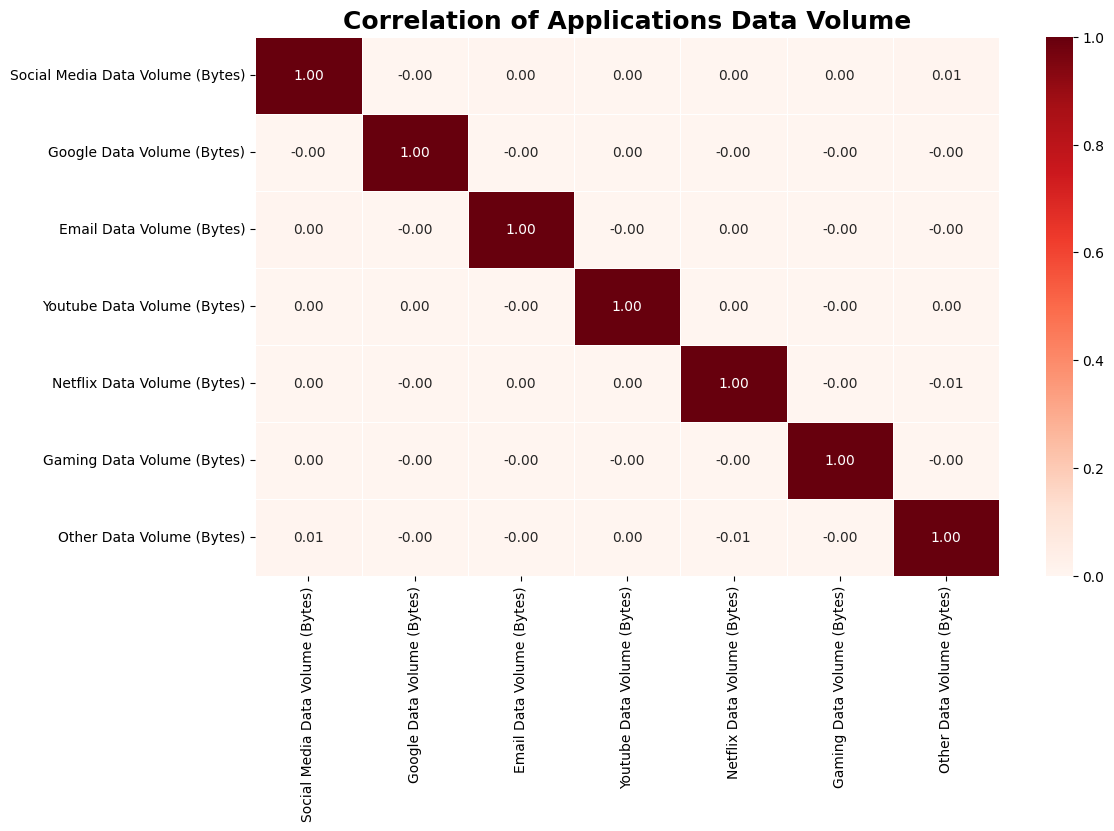

In [104]:
plot_heatmap(corr_df, "Correlation of Applications Data Volume")

As shown above there is no significant correlation among the applications data usage.

Filtering Data

Top 10 handsets used by the customers

In [107]:
handset_counts_df = count_values(tellco_clean_data, 'Handset Type').head(10)
handset_counts_df

,count,count
0,Huawei B528S-23A,19752
1,Apple iPhone 6S (A1688),9419
2,Apple iPhone 6 (A1586),9023
3,Apple iPhone 7 (A1778),6326
4,Apple iPhone Se (A1723),5187
5,Apple iPhone 8 (A1905),4993
6,Apple iPhone Xr (A2105),4568
7,Samsung Galaxy S8 (Sm-G950F),4520
8,Apple iPhone X (A1901),3813
9,Samsung Galaxy A5 Sm-A520F,3724


Top 3 handset manufacturers

In [108]:
top_manufacturers = count_values(tellco_clean_data, 'Handset Manufacturer').head(3)
top_manufacturers

,count,count
0,Apple,59565
1,Samsung,40839
2,Huawei,34423


Top 5 handsets of the top 3 handset manufacturers

In [ ]:
top3_manufacturers = top_manufacturers['Handset Manufacturer'].values
top_manufacturers = tellco_clean_data[tellco_clean_data["Handset Manufacturer"].isin(top3_manufacturers)]
top_manufacturers['Handset Type'].groupby(
    tellco_clean_data['Handset Manufacturer']).apply(lambda x: x.value_counts().head(5))

Purpose of The Above Analysis:
Knowing the most popular handset models allows the company to:
Target promotions for these devices.
Tailor service plans or upgrades based on device compatibility.

Number of xDR sessions of per user

In [116]:
xdr_per_user = find_agg(tellco_clean_data, 'MSISDN/Number', 'count', 'Bearer Id', False)
xdr_per_user.rename(
        columns={'Bearer Id': 'Number of xDR sessions'}, inplace=True)
xdr_per_user

,MSISDN/Number,Number of xDR sessions
0,3.362632e+10,18
1,3.361489e+10,17
2,3.362578e+10,17
3,3.365973e+10,16
4,3.367588e+10,15
...,...,...
106851,3.378969e+10,1
106852,3.378970e+10,1
106853,3.378973e+10,1
106854,3.378964e+10,1


Average session duration per user

In [120]:
session_duration_per_user = tellco_clean_data.groupby('MSISDN/Number').agg({'Dur. (ms)': 'mean'})
session_duration_per_user.rename(
        columns={'Dur. (ms)': 'Average session duration (ms)'}, inplace=True)
session_duration_per_user.sort_values(by=['Average session duration (ms)'], ascending=False).head(10)

,Average session duration (ms)
MSISDN/Number,
3.366926e+10,1573420.0
3.366172e+10,1480875.0
3.360750e+10,1474663.0
3.376260e+10,1375612.0
3.376063e+10,1361762.0
3.376167e+10,1357643.0
3.375034e+10,1321509.0
3.366682e+10,1299381.0
3.369870e+10,1209607.0


Total download (DL) and upload (UL) data per user

In [119]:
total_data = tellco_clean_data.groupby('MSISDN/Number')[[ 'Total UL (Bytes)', 'Total DL (Bytes)', 'Total Data Volume (Bytes)']].sum()
total_data.nlargest(10, 'Total Data Volume (Bytes)')

,Total UL (Bytes),Total DL (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,
3.361489e+10,689483001.0,8.156743e+09,8.846226e+09
3.376054e+10,703478581.0,7.811295e+09,8.514774e+09
3.362578e+10,729577380.0,7.770043e+09,8.499621e+09
3.362632e+10,669650721.0,7.301517e+09,7.971167e+09
3.367588e+10,581568792.0,7.309542e+09,7.891111e+09
3.365973e+10,624260321.0,7.081602e+09,7.705863e+09
3.366646e+10,405060976.0,6.903440e+09,7.308501e+09
3.376041e+10,521518890.0,6.610852e+09,7.132371e+09
3.366471e+10,471244453.0,6.400774e+09,6.872018e+09


Total data volume of each application per user

In [121]:
apps_total = tellco_clean_data.groupby('MSISDN/Number')[['Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)',
    'Email Data Volume (Bytes)', 'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)',
    'Gaming Data Volume (Bytes)', 'Other Data Volume (Bytes)', 'Total Data Volume (Bytes)']].sum()
apps_total.nlargest(10, 'Total Data Volume (Bytes)')

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,,,,,,
3.361489e+10,28294544.0,127973787.0,40788634.0,394370218.0,361401046.0,7.749432e+09,7.639264e+09,8.846226e+09
3.376054e+10,39783189.0,123223099.0,33693767.0,396289198.0,334643269.0,7.461045e+09,4.716134e+09,8.514774e+09
3.362578e+10,27135500.0,142307915.0,40633966.0,452958769.0,356980607.0,7.326673e+09,6.354583e+09,8.499621e+09
3.362632e+10,43374779.0,152191852.0,42418782.0,374483047.0,328725740.0,6.887572e+09,8.167878e+09,7.971167e+09
3.367588e+10,19222921.0,109860502.0,31514421.0,317410572.0,309093159.0,6.970568e+09,6.798515e+09,7.891111e+09
3.365973e+10,35412358.0,116516345.0,35999792.0,257991088.0,399519079.0,6.725559e+09,6.317415e+09,7.705863e+09
3.366646e+10,18629986.0,89320737.0,25557139.0,227336012.0,214416926.0,6.646303e+09,4.349141e+09,7.308501e+09
3.376041e+10,20777205.0,82738720.0,25576965.0,303169107.0,318347546.0,6.268620e+09,4.101645e+09,7.132371e+09
3.366471e+10,19390599.0,90389372.0,21426007.0,276834013.0,251798809.0,6.103856e+09,3.976960e+09,6.872018e+09
